<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

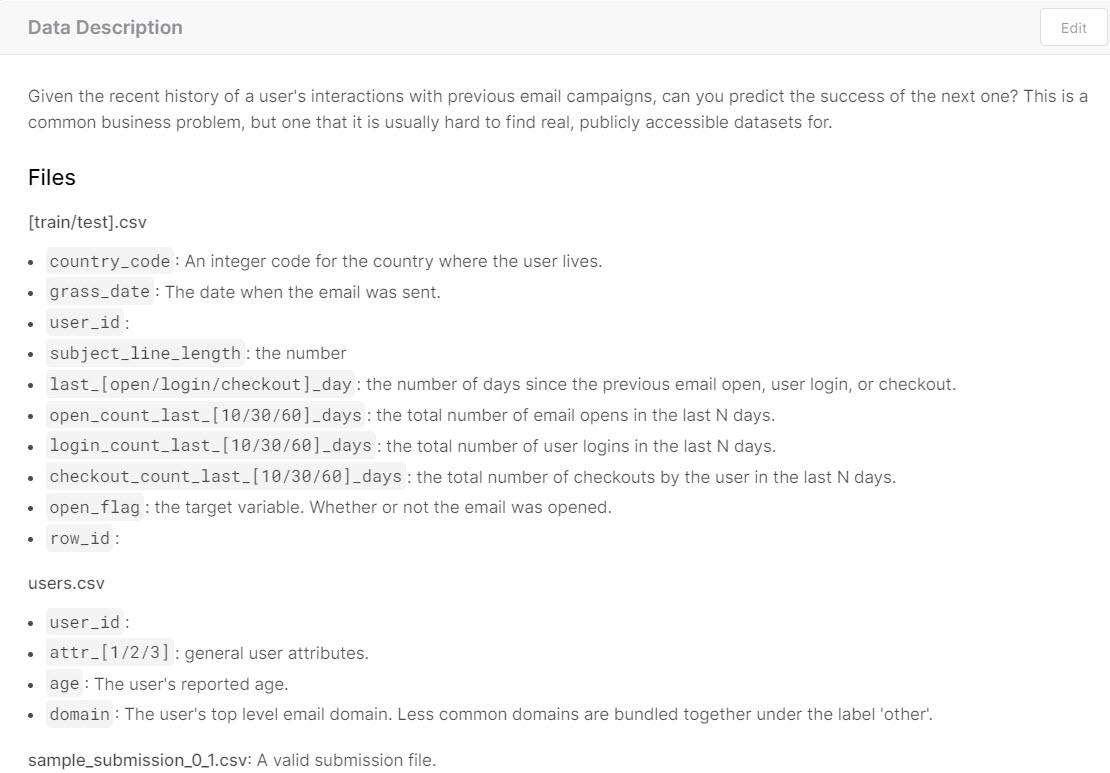

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# PCA  & LDA Analysis

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Define Functions

In [2]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

## Reading in the dataset

Reading User data

In [4]:
#Read the csv file 
dataset2_df = pd.read_csv('data/dataset2.csv')

In [5]:
dataset2_df

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,1.0,0.0,35,85,9,2000,0,0,0,17,...,0,0,1,0,0,0,0,0,1,0
1,1.0,2.0,64,59,1,3,0,0,1,27,...,0,0,0,1,0,0,0,0,0,0
2,1.0,1.0,50,40,9,253,0,0,3,2,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,35,2,1,2,1,3,3,31,...,1,0,0,0,0,0,0,1,0,0
4,1.0,0.0,40,29,3,6,0,1,2,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123559,1.0,0.0,49,2,21,2000,1,4,4,0,...,0,0,0,1,0,0,0,0,0,0
123560,1.0,0.0,41,22,3,27,0,2,4,0,...,0,0,0,0,1,0,0,0,0,0
123561,1.0,0.0,38,20,5,2000,0,3,7,0,...,0,0,0,0,0,1,0,0,0,0
123562,0.0,0.0,47,1000,7,2000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
dataset2_df.shape

(123564, 35)

In [7]:
dataset2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123564 entries, 0 to 123563
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   attr_2                       123564 non-null  float64
 1   attr_3                       123564 non-null  float64
 2   subject_line_length          123564 non-null  int64  
 3   last_open_day                123564 non-null  int64  
 4   last_login_day               123564 non-null  int64  
 5   last_checkout_day            123564 non-null  int64  
 6   open_count_last_10_days      123564 non-null  int64  
 7   open_count_last_30_days      123564 non-null  int64  
 8   open_count_last_60_days      123564 non-null  int64  
 9   login_count_last_10_days     123564 non-null  int64  
 10  login_count_last_30_days     123564 non-null  int64  
 11  login_count_last_60_days     123564 non-null  int64  
 12  checkout_count_last_10_days  123564 non-null  int64  
 13 

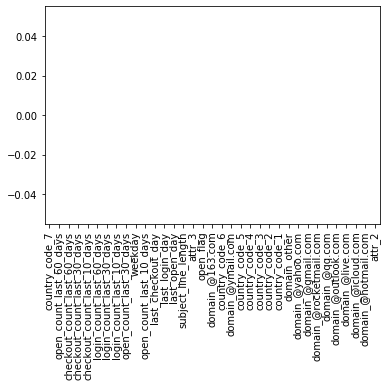

In [8]:
dataset2_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### Train-test split dataset

reading trainng data

In [9]:
X = dataset2_df.drop(['open_flag'], axis=1)
y = dataset2_df['open_flag']

In [10]:
X.shape

(123564, 34)

In [11]:
y.shape

(123564,)

In [12]:
features = list(X)
features

['attr_2',
 'attr_3',
 'subject_line_length',
 'last_open_day',
 'last_login_day',
 'last_checkout_day',
 'open_count_last_10_days',
 'open_count_last_30_days',
 'open_count_last_60_days',
 'login_count_last_10_days',
 'login_count_last_30_days',
 'login_count_last_60_days',
 'checkout_count_last_10_days',
 'checkout_count_last_30_days',
 'checkout_count_last_60_days',
 'weekday',
 'domain_@163.com',
 'domain_@gmail.com',
 'domain_@hotmail.com',
 'domain_@icloud.com',
 'domain_@live.com',
 'domain_@outlook.com',
 'domain_@qq.com',
 'domain_@rocketmail.com',
 'domain_@yahoo.com',
 'domain_@ymail.com',
 'domain_other',
 'country_code_1',
 'country_code_2',
 'country_code_3',
 'country_code_4',
 'country_code_5',
 'country_code_6',
 'country_code_7']

In [13]:
len(features)

34

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [15]:
X_train.shape

(100086, 34)

In [16]:
X_train.columns

Index(['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@163.com', 'domain_@gmail.com', 'domain_@hotmail.com',
       'domain_@icloud.com', 'domain_@live.com', 'domain_@outlook.com',
       'domain_@qq.com', 'domain_@rocketmail.com', 'domain_@yahoo.com',
       'domain_@ymail.com', 'domain_other', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7'],
      dtype='object')

In [17]:
X_val.shape

(11121, 34)

In [18]:
X_test.shape

(12357, 34)

#### Check for Co-relation

In [19]:
# correlation matrix (before stdze)
corr = X_train.corr()
print('Corelation Matrix:\n',X_train.corr())

Corelation Matrix:
                                attr_2    attr_3  subject_line_length  \
attr_2                       1.000000 -0.030163             0.038705   
attr_3                      -0.030163  1.000000            -0.000343   
subject_line_length          0.038705 -0.000343             1.000000   
last_open_day               -0.100133 -0.045410             0.049514   
last_login_day               0.001974 -0.086568            -0.004990   
last_checkout_day            0.004402 -0.342002             0.045931   
open_count_last_10_days      0.032117 -0.000383            -0.017322   
open_count_last_30_days      0.035627  0.000166            -0.030572   
open_count_last_60_days      0.035877  0.007339            -0.037060   
login_count_last_10_days     0.010935  0.219277            -0.007535   
login_count_last_30_days     0.008884  0.230690            -0.011088   
login_count_last_60_days     0.007689  0.241588            -0.013980   
checkout_count_last_10_days  0.008674  0.104

In [20]:
corr.to_csv('data/X_train_correlation_dataset2.csv')

### Apply standardscalar 

In [21]:
X_train.shape

(100086, 34)

In [22]:
scaler = StandardScaler().fit(X_train)

X_train_col_names = X_train.columns
y_train_col_names = y_train.to_frame().columns
X_val_col_names   = X_val.columns
y_val_col_names   = y_val.to_frame().columns
X_test_col_names  = X_test.columns
y_test_col_names  = y_test.to_frame().columns

X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform (X_val)
X_test_scaled  = scaler.transform (X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled)
#X_val_scaled = pd.DataFrame(X_val_scaled)
#X_test_scaled = pd.DataFrame(X_test_scaled)

from sklearn.externals import joblib
scaler_filename = "dataset2_scaler.save"
joblib.dump(scaler, scaler_filename) 

['dataset2_scaler.save']

In [23]:
X_train_scaled

array([[ 0.05083744, -0.06183315,  0.54222598, ..., -0.31000023,
        -0.2315959 , -0.20047336],
       [ 0.05083744, -1.03888281,  0.36275861, ..., -0.31000023,
        -0.2315959 , -0.20047336],
       [ 0.05083744, -1.03888281,  0.00382385, ..., -0.31000023,
        -0.2315959 , -0.20047336],
       ...,
       [ 0.05083744, -1.03888281, -0.26537721, ..., -0.31000023,
        -0.2315959 , -0.20047336],
       [ 0.05083744,  0.91521651, -1.79084991, ...,  3.22580408,
        -0.2315959 , -0.20047336],
       [ 0.05083744,  0.91521651, -0.89351303, ..., -0.31000023,
        -0.2315959 , -0.20047336]])

In [24]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_val_scaled_df = pd.DataFrame(X_val_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [25]:
X_train_scaled_df.columns = X_train_col_names
X_val_scaled_df.columns = X_train_col_names 
X_test_scaled_df.columns = X_train_col_names

X_val_scaled_df.head()

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,0.050837,-1.038883,-0.534578,-0.354615,-0.018636,1.857672,1.315214,1.736157,0.679403,-0.649055,...,-0.2826,-0.052586,-0.151201,-0.675049,1.959408,-0.463877,-0.379728,-0.31,-0.231596,-0.200473
1,-19.670542,0.915217,-1.162714,3.525579,-0.139768,-0.599636,-0.728400,-0.790147,-0.794251,1.392056,...,-0.2826,-0.052586,-0.151201,-0.675049,-0.510358,-0.463877,2.633467,-0.31,-0.231596,-0.200473
2,0.050837,-1.038883,-0.444845,-0.358507,0.419748,1.857672,-0.319677,-0.316465,-0.241631,-0.649055,...,-0.2826,-0.052586,6.613711,-0.675049,-0.510358,-0.463877,-0.379728,-0.31,4.317866,-0.200473
3,0.050837,-0.061833,-0.983247,3.525579,-0.113811,-0.578602,-0.728400,-0.790147,-0.794251,-0.573458,...,-0.2826,-0.052586,-0.151201,-0.675049,-0.510358,2.155745,-0.379728,-0.31,-0.231596,-0.200473
4,0.050837,-1.038883,-0.893513,-0.323480,-0.142652,-0.140592,-0.728400,-0.632253,-0.702147,-0.346668,...,-0.2826,-0.052586,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.31,-0.231596,-0.200473


In [26]:
#*******************************************************************************
#                         Save train scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_train_scaled_dataset2.xlsx', engine='xlsxwriter')

X_train_scaled_df.to_excel(writer, sheet_name='X_train_scaled', index = False)
y_train.to_excel(writer, sheet_name='y_train', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [27]:
#*******************************************************************************
#                         Save val scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_val_scaled_dataset2.xlsx', engine='xlsxwriter')

X_val_scaled_df.to_excel(writer, sheet_name='X_val_scaled', index = False)
y_val.to_excel(writer, sheet_name='y_val', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [28]:
#*******************************************************************************
#                         Save test scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_test_scaled_dataset2.xlsx', engine='xlsxwriter')

X_test_scaled_df.to_excel(writer, sheet_name='X_test_scaled', index = False)
y_test.to_excel(writer, sheet_name='y_test', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Applying LDA

In [29]:
# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X_train_scaled, y_train)

In [30]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([1.])

In [31]:
# Run function
select_n_components(lda_var_ratios, 0.95)

1

In [32]:
#  Applying LDA
lda = LDA(n_components=4)
X_train_PDA = lda.fit(X_train_scaled, y_train)

In [33]:
# Show the result of LDA
print("Model Priors:\n",lda.priors_)

Model Priors:
 [0.50044961 0.49955039]


In [34]:
# Get the loadings
scalings = pd.DataFrame(lda.scalings_)
scalings.insert(0,'features',features[0:len(features)])
print("LDA Loadings:\n",scalings)

LDA Loadings:
                        features         0
0                        attr_2  0.015635
1                        attr_3 -0.034565
2           subject_line_length -0.029205
3                 last_open_day -0.083285
4                last_login_day  0.007089
5             last_checkout_day  0.016721
6       open_count_last_10_days  0.638037
7       open_count_last_30_days  0.306048
8       open_count_last_60_days  0.182304
9      login_count_last_10_days  0.128754
10     login_count_last_30_days -0.020913
11     login_count_last_60_days -0.137491
12  checkout_count_last_10_days -0.002656
13  checkout_count_last_30_days  0.028389
14  checkout_count_last_60_days -0.017543
15                      weekday -0.079678
16              domain_@163.com -0.001943
17            domain_@gmail.com -0.014765
18          domain_@hotmail.com -0.017626
19           domain_@icloud.com  0.010156
20             domain_@live.com  0.008919
21          domain_@outlook.com -0.031081
22               do

In [35]:
# Saving the LDA Loadings into excel file

# Create a new excel workbook
writer = pd.ExcelWriter('data/LDA_Loadings_dataset2.xlsx', engine='xlsxwriter')

scalings.to_excel(writer, sheet_name='LDA Loadings', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [36]:
# Get the Eigenvectors
coeff= pd.DataFrame(np.transpose(lda.coef_))
coeff.insert(0,'features',features[0:len(features)])
print("\nLDA Coefficients:\n",coeff)


LDA Coefficients:
                        features         0
0                        attr_2  0.023036
1                        attr_3 -0.050924
2           subject_line_length -0.043028
3                 last_open_day -0.122703
4                last_login_day  0.010443
5             last_checkout_day  0.024635
6       open_count_last_10_days  0.940016
7       open_count_last_30_days  0.450899
8       open_count_last_60_days  0.268588
9      login_count_last_10_days  0.189693
10     login_count_last_30_days -0.030810
11     login_count_last_60_days -0.202564
12  checkout_count_last_10_days -0.003912
13  checkout_count_last_30_days  0.041826
14  checkout_count_last_60_days -0.025846
15                      weekday -0.117388
16              domain_@163.com -0.002862
17            domain_@gmail.com -0.021752
18          domain_@hotmail.com -0.025968
19           domain_@icloud.com  0.014963
20             domain_@live.com  0.013140
21          domain_@outlook.com -0.045791
22            

In [37]:
# Apply LDA on the Testset
from sklearn.metrics import confusion_matrix, classification_report, precision_score

pred=lda.predict(X_test)
print(np.unique(pred, return_counts=True))
print("\nConfusion Matrix:\n", confusion_matrix(pred, y_test))
print('\n')
print(classification_report(y_test, pred, digits=3))

(array([0, 1], dtype=int64), array([7041, 5316], dtype=int64))

Confusion Matrix:
 [[4353 2688]
 [1803 3513]]


              precision    recall  f1-score   support

           0      0.618     0.707     0.660      6156
           1      0.661     0.567     0.610      6201

    accuracy                          0.637     12357
   macro avg      0.640     0.637     0.635     12357
weighted avg      0.640     0.637     0.635     12357



### Applying PCA

In [38]:
colnames = np.transpose(features)
n_components = len(features)
pca = PCA(n_components).fit(X_train_scaled)
X_train_PCA = pca.transform(X_train_scaled)

In [39]:
pca_data_org = pd.DataFrame(X_train_PCA)
pca_data_org

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.354233,0.669961,-1.265078,0.525208,-1.319203,0.326411,-0.044133,-0.257876,1.267491,0.689954,...,-1.065553,-0.552975,0.006817,0.121672,0.018680,-0.023121,0.200044,-0.022351,-1.949256e-16,-9.352263e-18
1,1.727223,-2.222559,-0.694365,0.654624,0.703974,0.230475,-0.837553,3.220870,-1.192807,-0.799610,...,1.316532,0.341796,-0.050719,-0.003803,0.472185,-0.074217,-0.019628,-0.113699,-3.059479e-16,-7.865084e-16
2,0.326828,-0.559582,-0.893730,-0.455312,-0.913513,0.202434,-0.117392,-0.313350,1.274768,0.111227,...,0.971141,0.436573,-0.442239,-0.716269,0.307124,0.076895,-0.107646,-0.178490,-1.949256e-16,-1.203746e-16
3,-0.795430,2.928956,-2.099814,0.609774,-0.478529,0.663508,-1.728418,0.341673,-1.743968,0.525667,...,0.460408,-1.400192,-0.026152,-0.081640,0.045423,-0.097615,0.829825,-0.063578,-1.949256e-16,3.237146e-16
4,-1.145401,0.437000,0.414648,-0.702601,2.782725,-1.600657,-0.460830,-0.481031,1.652462,0.423430,...,0.827750,-0.293386,-0.036437,0.168394,0.055562,-0.005658,-0.025032,0.014906,-1.013715e-15,1.016700e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100081,-1.155194,-0.115011,4.097015,0.323457,-0.211533,1.718871,-0.153437,-0.108393,1.914572,-1.790279,...,0.791719,0.700540,0.101711,-0.119542,-0.103232,0.073147,0.041872,-0.055311,-1.342103e-16,3.792258e-16
100082,1.506323,-2.030162,-0.947638,-1.659141,-1.518416,0.185915,-0.246082,-0.050064,-0.108539,0.161116,...,0.052351,-0.165711,0.172812,-0.010152,-0.268682,-0.155155,0.003311,-0.007707,2.491636e-16,4.347369e-16
100083,-1.728323,-1.513565,-0.575236,0.321749,-0.657509,-0.195273,0.638920,0.139871,1.077998,1.380438,...,-1.102759,0.545796,0.015223,-0.038470,-0.066230,-0.049332,-0.003738,0.080503,-1.394144e-16,3.237146e-16
100084,0.261294,-1.329569,0.593790,-0.956409,3.078976,-1.754296,-0.460547,-0.858684,0.450722,0.776187,...,-0.321267,-0.305019,-0.583616,0.104860,0.219122,0.269433,-0.014129,-0.008764,-7.361593e-16,2.126923e-16


In [40]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_
pca_eigenVal_var = pd.DataFrame(eigval,index=PCs)
pca_eigenVal_var

,0
PC1,4.265394e+00
PC2,3.042959e+00
PC3,2.060306e+00
PC4,1.750294e+00
PC5,1.632521e+00
PC6,1.462605e+00
PC7,1.283615e+00
PC8,1.259777e+00
PC9,1.205212e+00
PC10,1.098358e+00


In [41]:
X_train_PCA = pd.DataFrame(X_train_PCA,columns=PCs)
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,-1.354233,0.669961,-1.265078,0.525208,-1.319203,0.326411,-0.044133,-0.257876,1.267491,0.689954,...,-1.065553,-0.552975,0.006817,0.121672,0.018680,-0.023121,0.200044,-0.022351,-1.949256e-16,-9.352263e-18
1,1.727223,-2.222559,-0.694365,0.654624,0.703974,0.230475,-0.837553,3.220870,-1.192807,-0.799610,...,1.316532,0.341796,-0.050719,-0.003803,0.472185,-0.074217,-0.019628,-0.113699,-3.059479e-16,-7.865084e-16
2,0.326828,-0.559582,-0.893730,-0.455312,-0.913513,0.202434,-0.117392,-0.313350,1.274768,0.111227,...,0.971141,0.436573,-0.442239,-0.716269,0.307124,0.076895,-0.107646,-0.178490,-1.949256e-16,-1.203746e-16
3,-0.795430,2.928956,-2.099814,0.609774,-0.478529,0.663508,-1.728418,0.341673,-1.743968,0.525667,...,0.460408,-1.400192,-0.026152,-0.081640,0.045423,-0.097615,0.829825,-0.063578,-1.949256e-16,3.237146e-16
4,-1.145401,0.437000,0.414648,-0.702601,2.782725,-1.600657,-0.460830,-0.481031,1.652462,0.423430,...,0.827750,-0.293386,-0.036437,0.168394,0.055562,-0.005658,-0.025032,0.014906,-1.013715e-15,1.016700e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100081,-1.155194,-0.115011,4.097015,0.323457,-0.211533,1.718871,-0.153437,-0.108393,1.914572,-1.790279,...,0.791719,0.700540,0.101711,-0.119542,-0.103232,0.073147,0.041872,-0.055311,-1.342103e-16,3.792258e-16
100082,1.506323,-2.030162,-0.947638,-1.659141,-1.518416,0.185915,-0.246082,-0.050064,-0.108539,0.161116,...,0.052351,-0.165711,0.172812,-0.010152,-0.268682,-0.155155,0.003311,-0.007707,2.491636e-16,4.347369e-16
100083,-1.728323,-1.513565,-0.575236,0.321749,-0.657509,-0.195273,0.638920,0.139871,1.077998,1.380438,...,-1.102759,0.545796,0.015223,-0.038470,-0.066230,-0.049332,-0.003738,0.080503,-1.394144e-16,3.237146e-16
100084,0.261294,-1.329569,0.593790,-0.956409,3.078976,-1.754296,-0.460547,-0.858684,0.450722,0.776187,...,-0.321267,-0.305019,-0.583616,0.104860,0.219122,0.269433,-0.014129,-0.008764,-7.361593e-16,2.126923e-16


In [42]:
pca

PCA(copy=True, iterated_power='auto', n_components=34, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=features),'\n')
Loadings = pd.DataFrame(loadings,columns=PCs,index=features)

Loading Matrix:
                                  PC1       PC2       PC3       PC4       PC5  \
attr_2                       0.014070  0.049291 -0.150696  0.034103 -0.083139   
attr_3                       0.313129 -0.057613 -0.052991 -0.284478  0.069235   
subject_line_length         -0.016915 -0.110018 -0.263950  0.231867 -0.650209   
last_open_day               -0.155076 -0.356404  0.039196  0.134499  0.020579   
last_login_day              -0.141046 -0.000375  0.025185  0.127219  0.029228   
last_checkout_day           -0.438303 -0.002412 -0.021219  0.279590 -0.177819   
open_count_last_10_days      0.161579  0.885844 -0.169442  0.023667 -0.051029   
open_count_last_30_days      0.165310  0.935255 -0.175196  0.026640 -0.048881   
open_count_last_60_days      0.169694  0.914604 -0.172147  0.020166 -0.044776   
login_count_last_10_days     0.828420 -0.086066 -0.024545 -0.350448 -0.139184   
login_count_last_30_days     0.850705 -0.085743 -0.024796 -0.372567 -0.142295   
login_count_

In [44]:
# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=features),'\n')
EigenVectors = pd.DataFrame(eigvec,columns=PCs,index=features)


Eigenvectors (Linear Coefficients):
                                  PC1       PC2       PC3       PC4       PC5  \
attr_2                       0.006813  0.028257 -0.104987  0.025777 -0.065069   
attr_3                       0.151615 -0.033028 -0.036918 -0.215027  0.054187   
subject_line_length         -0.008190 -0.063069 -0.183889  0.175260 -0.508889   
last_open_day               -0.075087 -0.204312  0.027307  0.101663  0.016107   
last_login_day              -0.068294 -0.000215  0.017546  0.096160  0.022875   
last_checkout_day           -0.212224 -0.001382 -0.014783  0.211333 -0.139171   
open_count_last_10_days      0.078236  0.507819 -0.118047  0.017889 -0.039938   
open_count_last_30_days      0.080042  0.536145 -0.122056  0.020137 -0.038257   
open_count_last_60_days      0.082165  0.524306 -0.119932  0.015243 -0.035045   
login_count_last_10_days     0.401117 -0.049338 -0.017100 -0.264891 -0.108933   
login_count_last_30_days     0.411907 -0.049153 -0.017275 -0.281610 -0.1

In [45]:
var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 20 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')

Eigenvalues   : [4.26539374 3.04295904 2.06030621 1.75029357 1.63252131 1.46260487
 1.28361518 1.25977669 1.20521178 1.09835805 1.0577536  1.02616725
 1.01561746 1.00746643 1.00254271 1.00153831 0.99878305 0.98250427
 0.95746281 0.94608708]
%Explained_Var: [12.54515037  8.9497901   6.05966361  5.14787083  4.8014853   4.30173604
  3.77530105  3.70518854  3.5447051   3.23043259  3.11100893  3.01810881
  2.98708032  2.96310694  2.94862558  2.94567148  2.93756785  2.88968956
  2.81603896  2.78258126]
%Cumulative   : [12.54515037 21.49494047 27.55460408 32.7024749  37.5039602  41.80569625
 45.5809973  49.28618584 52.83089094 56.06132353 59.17233246 62.19044126
 65.17752159 68.14062853 71.08925411 74.03492559 76.97249343 79.86218299
 82.67822195 85.46080321]




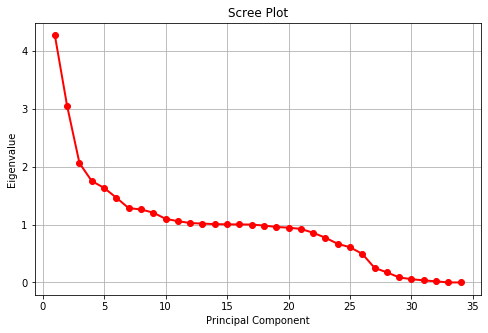

In [46]:
## (9) scree plot
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(); plt.show()


In [47]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.25451504e-01, 8.94979010e-02, 6.05966361e-02, 5.14787083e-02,
       4.80148530e-02, 4.30173604e-02, 3.77530105e-02, 3.70518854e-02,
       3.54470510e-02, 3.23043259e-02, 3.11100893e-02, 3.01810881e-02,
       2.98708032e-02, 2.96310694e-02, 2.94862558e-02, 2.94567148e-02,
       2.93756785e-02, 2.88968956e-02, 2.81603896e-02, 2.78258126e-02,
       2.71746056e-02, 2.52292664e-02, 2.26938483e-02, 1.96066292e-02,
       1.78682373e-02, 1.45024853e-02, 7.37627737e-03, 5.11917644e-03,
       2.56296762e-03, 1.63404933e-03, 1.06907840e-03, 5.55346819e-04,
       2.47409467e-32, 2.29314881e-33])

<h3>Save all PCA and LDA Results to excel file<h3>

In [48]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Loadings_dataset2.xlsx', engine='xlsxwriter')

pca_eigenVal_var.to_excel(writer, sheet_name='pca_eigenVal_var')
Loadings.to_excel(writer, sheet_name='Loadings')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [49]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_EigenVectors_dataset2.xlsx', engine='xlsxwriter')

EigenVectors.to_excel(writer, sheet_name='EigenVectors')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [50]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Data_dataset2.xlsx', engine='xlsxwriter')

X_train_PCA.to_excel(writer, sheet_name='PCA Data', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()